In [96]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.widgets import Slider
from sklearn import cluster ,datasets

In [97]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [98]:
varied = pd.DataFrame(datasets.make_blobs(n_samples=1500,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=170)[0])

In [99]:
agnes =pd.DataFrame([cluster.AgglomerativeClustering(n_clusters=i).fit(varied).labels_ for i in range(1,8)])

In [100]:
agnes

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,1,1,1,0,...,0,0,0,1,0,1,0,0,0,0
2,0,0,1,0,0,2,1,1,1,2,...,0,0,2,1,2,1,0,2,2,2
3,1,0,3,0,1,2,3,3,3,2,...,1,1,2,3,2,3,1,2,2,2
4,0,4,1,3,0,2,1,1,1,2,...,0,0,2,1,2,1,0,2,2,2
5,0,4,1,3,2,5,1,1,1,5,...,0,0,5,1,5,1,0,5,5,5
6,3,4,0,1,2,5,0,0,0,5,...,3,6,5,0,5,0,3,5,5,5


In [101]:
agnes2 = agnes

In [102]:
agnes2.iloc[5,:] = agnes.iloc[6,:].map({0:0,1:1,2:2,3:3,4:4,5:5,6:3})

In [103]:
agnes2.iloc[4,:] = agnes.iloc[5,:].map({0:0,1:1,2:2,3:2,4:4,5:5,6:3})

In [104]:
agnes2.iloc[3,:] = agnes.iloc[4,:].map({0:0,1:1,2:2,3:2,4:1,5:5,6:3})

In [105]:
agnes2.iloc[2,:] = agnes.iloc[3,:].map({0:0,1:2,2:2,3:2,4:1,5:5,6:3})

In [106]:
agnes2.iloc[1,:] = agnes.iloc[2,:].map({0:0,1:2,2:2,3:2,4:1,5:2,6:3})

In [109]:
agnes2.iloc[0,:] = agnes.iloc[1,:].map({0:2,1:2,2:2,3:2,4:1,5:2,6:3})

In [110]:
agnes2

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1,2,2,0,2,2,2,0,0,0,2,...,2,2,2,0,2,0,2,2,2,2
2,2,2,0,2,2,5,0,0,0,5,...,2,2,5,0,5,0,2,5,5,5
3,2,1,0,1,2,5,0,0,0,5,...,2,2,5,0,5,0,2,5,5,5
4,2,4,0,1,2,5,0,0,0,5,...,2,2,5,0,5,0,2,5,5,5
5,3,4,0,1,2,5,0,0,0,5,...,3,3,5,0,5,0,3,5,5,5
6,3,4,0,1,2,5,0,0,0,5,...,3,6,5,0,5,0,3,5,5,5


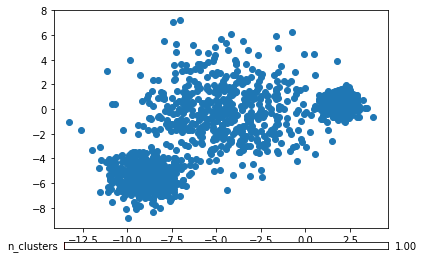

In [93]:
fig = plt.figure()
val = 30
agnes =cluster.AgglomerativeClustering(n_clusters=val)
col=agnes.fit(varied).labels_
cmap = cm.ScalarMappable(colors.Normalize(0,7),cm.rainbow)
line = plt.scatter(varied.iloc[:,0],varied.iloc[:,1])
ax = plt.axes([0.15,0.05,0.75,0.025])
slider = Slider(ax,label = 'n_clusters',valmax = 7, valmin = 1,valstep=1,valinit=1)
def updata(val) :
    col = agnes2.iloc[int(val)-1,:]
    line.set_color(cmap.to_rgba(col))
    fig.canvas.draw_idle()
slider.on_changed(updata)
plt.show()